In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.pipeline import Pipeline
from sklearn import metrics
import matplotlib.pyplot as plt# library for creating static, animated, and interactive visualizations in Python
import re #Regular expression
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns #visualization tool library
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
import sklearn.metrics as metrics

In [2]:
#Importing the json data file
df=pd.read_json("C:/Users/Sai Kishore/Desktop/Sarcasm_Headlines_Dataset .json",lines=True)

In [3]:
#Resturn the first n rows. by default it will show 5 rows.
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [4]:
#Checking for null values in the data set
df.isnull().sum()

is_sarcastic    0
headline        0
article_link    0
dtype: int64

In [5]:
#It shows the summary of the dataframe like the datatype and Non-Null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


In [6]:
#It shows the count of unique values 
df.is_sarcastic.value_counts()

0    14985
1    13634
Name: is_sarcastic, dtype: int64

In [7]:
#It shows the basic statistical details
df.describe()

,is_sarcastic
count,28619.000000
mean,0.476397
std,0.499451
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


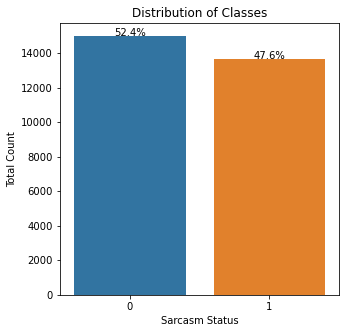

In [8]:
#Distribution of classes
plt.figure(figsize=(5,5))
ax = sns.countplot(x='is_sarcastic',  data=df)
ax.set(title = "Distribution of Classes", xlabel="Sarcasm Status", ylabel = "Total Count")
#Convert a string or number to a floating point number
total = float(len(df ))
for p in ax.patches:
    #p.get_height():Return the height of the rectangle
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.1f}%'.format((height/total)*100),
            ha="center") 
plt.show()

In [9]:
df.article_link.apply(lambda x: x.split('/')[2]).value_counts()

www.huffingtonpost.com          14403
www.theonion.com                 6577
local.theonion.com               3351
politics.theonion.com            2222
entertainment.theonion.com       1337
www.huffingtonpost.comhttp:       503
sports.theonion.com               123
www.huffingtonpost.comhttps:       79
ogn.theonion.com                   24
Name: article_link, dtype: int64

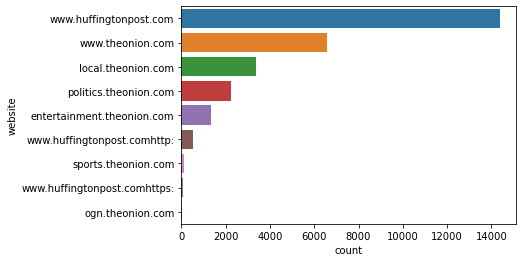

In [10]:
df['website'] = df.article_link.apply(lambda x: x.split('/')[2])
sns.countplot(y= df.website ,data=df, order = df['website'].value_counts().index)

A count plot can be thought of as a histogram across a categorical, instead
of quantitative, variable. The basic API and options are identical to those
for :func:`barplot`, so you can compare counts across nested variables.

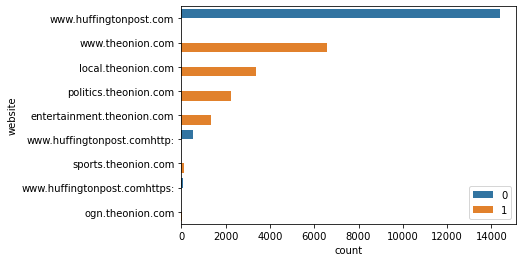

In [41]:
sns.countplot(y= df.website, hue="is_sarcastic" ,data=df, order = df['website'].value_counts().index)
plt.legend(loc='lower right')

##########################

In [12]:
df['article_link'] = df['article_link'].apply(lambda s : re.sub('[^a-zA-Z]', ' ', s))

In [13]:
df.head()

,is_sarcastic,headline,article_link,website
0,1,thirtysomething scientists unveil doomsday clo...,https www theonion com thirtysomething scien...,www.theonion.com
1,0,dem rep. totally nails why congress is falling...,https www huffingtonpost com entry donna edw...,www.huffingtonpost.com
2,0,eat your veggies: 9 deliciously different recipes,https www huffingtonpost com entry eat your ...,www.huffingtonpost.com
3,1,inclement weather prevents liar from getting t...,https local theonion com inclement weather p...,local.theonion.com
4,1,mother comes pretty close to using word 'strea...,https www theonion com mother comes pretty c...,www.theonion.com


In [14]:
# Wordcloud for top 200 frequent words in headline column
import string
text = df.headline
text = " ".join(review for review in df.headline)
"".join([word for word in text if word not in string.punctuation])
print ("There are {} words in the combination of all review.".format(len(text)))

There are 1811827 words in the combination of all review.


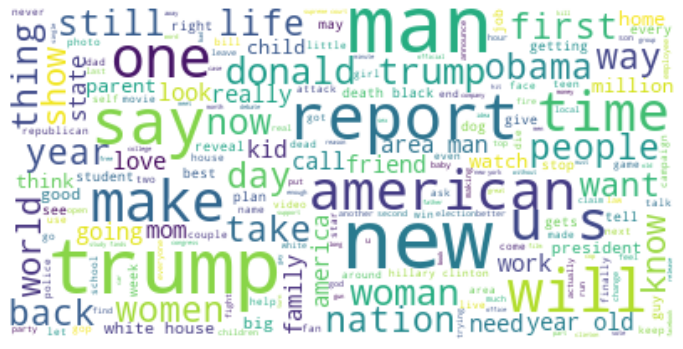

In [15]:
# Generate a word cloud image
wordcloud = WordCloud(max_font_size=50, max_words=200, background_color="white").generate(text)
plt.figure(figsize=(12, 12))
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
#The plt.axis() method allows you to set the x and y limits with a single call
plt.axis("off")
plt.show()

Trigram to find sarcastic sentences

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
temp_df = df[df['is_sarcastic'] ==1]
#Convert a collection of text documents to a matrix of token counts
word_vectorizer = CountVectorizer(ngram_range=(3, 3), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(temp_df['headline'])
frequencies = sum(sparse_matrix).toarray()[0]
df1=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by='frequency', ascending=False).reset_index().head(10)

In [17]:
df1.head()

,index,frequency
0,new study finds,35
1,in front of,25
2,game of thrones,23
3,of the union,22
4,state of the,22


<AxesSubplot:xlabel='frequency', ylabel='index'>

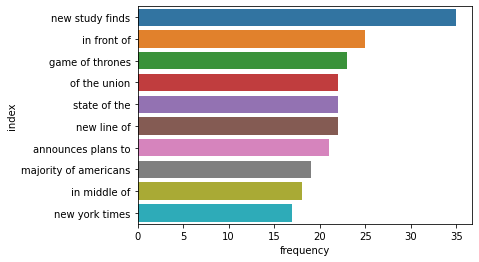

In [18]:
sns.barplot(data=df1, y='index', x='frequency')

To find 50 sarcastic words

In [19]:
sarcastic = df[df.is_sarcastic==1]
sarcastic.reset_index(drop=True, inplace=True)

not_sarcastic = df[df.is_sarcastic==0]
not_sarcastic.reset_index(drop=True, inplace=True)

# Tokenizing the Headlines of Sarcasm
sarcastic_news = []
for rows in range(0, sarcastic.shape[0]):
    head_txt = sarcastic.headline[rows]
    head_txt = head_txt.split(" ")
    sarcastic_news.append(head_txt)

#Converting into single list for Sarcasm
import itertools

##itertools.chain(*iterables)Make an iterator that returns elements from the first iterable until it is exhausted, 
#then proceeds to the next iterable, until all of the iterables are exhausted. 
#Used for treating consecutive sequences as a single sequence.

sarcastic_list = list(itertools.chain(*sarcastic_news))

# Tokenizing the Headlines of Non_sarcastic
not_sarcastic_news = []
for rows in range(0, not_sarcastic.shape[0]):
    head_txt = not_sarcastic.headline[rows]
    head_txt = head_txt.split(" ")
    not_sarcastic_news.append(head_txt)
    
#Converting into single list for Non_sarcastic
not_sarcastic_list = list(itertools.chain(*not_sarcastic_news))

In [20]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')

sarcastic_list_restp = [word for word in sarcastic_list if word.lower() not in stopwords]

not_sarcastic_list_restp = [word for word in not_sarcastic_list if word.lower() not in stopwords]

print("Length of original Sarcasm list: {0} words\n"
      "Length of Sarcasm list after stopwords removal: {1} words"
      .format(len(sarcastic_list), len(sarcastic_list_restp)))
print("=="*46)

print("Length of original non sarcastic list: {0} words\n"
      "Length of non sarcastic list after stopwords removal: {1} words"
      .format(len(not_sarcastic_list), len(not_sarcastic_list_restp)))

Length of original Sarcasm list: 140546 words
Length of Sarcasm list after stopwords removal: 105627 words
Length of original non sarcastic list: 147128 words
Length of non sarcastic list after stopwords removal: 103525 words


In [21]:
#Data cleaning for getting top 50
from collections import Counter
##Counter()->Dict subclass for counting hashable items.  Sometimes called a bag or multiset.
##Elements are stored as dictionary keys and their counts
##are stored as dictionary values.
sarcastic_count = Counter(sarcastic_list_restp)

not_sarcastic_count = Counter(not_sarcastic_list_restp)


#Dictonary to Dataframe
sarcastic_count_df = pd.DataFrame(list(sarcastic_count.items()), columns = ['Words', 'Freq'])
sarcastic_count_df = sarcastic_count_df.sort_values(by=['Freq'], ascending=False)

not_sarcastic_count_df = pd.DataFrame(list(not_sarcastic_count.items()), columns = ['Words', 'Freq'])
not_sarcastic_count_df = not_sarcastic_count_df.sort_values(by=['Freq'], ascending=False)


#Top 50
sarcastic_count_df_50 = sarcastic_count_df.head(50)
not_sarcastic_count_df_50 = not_sarcastic_count_df.head(50)


In [22]:
sarcastic_count_df_50.reset_index(drop=True,inplace=True)

In [23]:
sarcastic_count_df_50.head()

,Words,Freq
0,man,1143
1,new,973
2,area,487
3,report:,428
4,woman,353


In [24]:
not_sarcastic_count_df_50.reset_index(drop=True,inplace=True)

In [25]:
not_sarcastic_count_df_50.head()

,Words,Freq
0,trump,957
1,new,664
2,donald,453
3,trump's,364
4,says,346


Finding Topics Related To News Article Headline

In [26]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
#Convert a collection of text documents to a matrix of token counts
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = cv.fit_transform(df['headline'])

In [27]:
LDA = LatentDirichletAllocation(n_components=7,random_state=42)#n_components is the number of topics default is 10

In [28]:
LDA.fit(dtm)

LatentDirichletAllocation(n_components=7, random_state=42)

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_df=0.8, min_df=2, stop_words='english')
#The astype('U') is telling numpy to convert the data to Unicode (essentially a string in python 3)
doc_term_matrix = tfidf_vect.fit_transform(df['headline'].values.astype('U'))
from sklearn.decomposition import NMF

nmf = NMF(n_components=5, random_state=42)
nmf.fit(doc_term_matrix )

NMF(n_components=5, random_state=42)

In [30]:
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-25:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['reveals', 'says', 'time', 'media', 'supreme', 'obama', 'little', 'life', 'study', 'finds', 'news', 'love', 'american', 'year', 'court', 'old', 'world', 'right', 'climate', 'change', 'man', 'donald', 'report', 'trump', 'new']


THE TOP 15 WORDS FOR TOPIC #1
['business', 'apple', 'christmas', 'best', 'bernie', 'stop', 'says', 'college', 'life', 'sanders', 'women', 'love', 'boy', 'really', 'book', 'sex', 'high', 'home', 'teen', 'year', 'million', 'report', 'school', '10', 'new']


THE TOP 15 WORDS FOR TOPIC #2
['study', 'friend', 'work', 'real', 'going', 'mom', 'new', 'video', 'report', 'friends', 'good', 'life', 'nation', 'really', 'years', 'office', 'thing', 'guy', 'like', 'way', 'time', 'woman', 'just', 'area', 'man']


THE TOP 15 WORDS FOR TOPIC #3
['black', 'political', 'clinton', 'end', 'says', 'court', 'people', 'america', 'rights', 'john', 'campaign', 'donald', 'time', 'ryan', 'care', 'gop', 'bush', 'white', 'gay', 'american', 'paul', 'house', 'heal

In [31]:
##nmf.transform()->Transform the data X according to the fitted Non-Negative Matrix Factorization (NMF) model
topic_values = nmf.transform(doc_term_matrix)
df['Topic'] = topic_values.argmax(axis=1)
df.head()

,is_sarcastic,headline,article_link,website,Topic
0,1,thirtysomething scientists unveil doomsday clo...,https www theonion com thirtysomething scien...,www.theonion.com,3
1,0,dem rep. totally nails why congress is falling...,https www huffingtonpost com entry donna edw...,www.huffingtonpost.com,3
2,0,eat your veggies: 9 deliciously different recipes,https www huffingtonpost com entry eat your ...,www.huffingtonpost.com,3
3,1,inclement weather prevents liar from getting t...,https local theonion com inclement weather p...,local.theonion.com,3
4,1,mother comes pretty close to using word 'strea...,https www theonion com mother comes pretty c...,www.theonion.com,3


In [32]:
df.Topic.value_counts()

3    21621
2     2161
1     1976
0     1950
4      911
Name: Topic, dtype: int64

In [33]:
df1=df.groupby('headline').filter(lambda x : (x.Topic==1).all()).copy()

In [34]:
df1.head()

,is_sarcastic,headline,article_link,website,Topic
16,1,area boy enters jumping-and-touching-tops-of-d...,https www theonion com area boy enters jumpi...,www.theonion.com,1
17,1,area man does most of his traveling by gurney,https local theonion com area man does most ...,local.theonion.com,1
40,0,the best clothes for the man-child in your life,https www huffingtonpost com entry how to dr...,www.huffingtonpost.com,1
73,0,biting argument over trump may cost man his ear,https www huffingtonpost com entry trump ear...,www.huffingtonpost.com,1
107,1,local man's fear of snakes increases with each...,https local theonion com local mans fear of ...,local.theonion.com,1


In [35]:
df2=df.groupby('headline').filter(lambda x : (x.Topic==2).all()).copy()

In [36]:
df2.head()

,is_sarcastic,headline,article_link,website,Topic
14,1,ford develops new suv that runs purely on gaso...,https www theonion com ford develops new suv...,www.theonion.com,2
26,0,this new orange era: the growing divide,https www huffingtonpost com entry this new ...,www.huffingtonpost.com,2
34,1,new york introduces shoe-sharing program for c...,https www theonion com new york introduces s...,www.theonion.com,2
43,0,new google project delivers critical info to r...,https www huffingtonpost com entry google an...,www.huffingtonpost.com,2
44,1,new history textbook makes hatred of history c...,https www theonion com new history textbook ...,www.theonion.com,2


# Model Testing

In [37]:
headlines = df.headline


In [38]:
import nltk 
from nltk.corpus import stopwords 
nltk.download('stopwords')
nltk.download('punkt')

def text_process(text):
# maketrans() method is a static method that creates a one to one mapping of a character to its translation/replacement.
#It creates a Unicode representation of each character for translation.
#This translation mapping is then used for replacing a character to its mapped character when used in translate() method
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    
    return " ".join(text)

[nltk_data] Downloading package stopwords to C:\Users\Sai
[nltk_data]     Kishore\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Sai
[nltk_data]     Kishore\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [39]:
#Example to show how text_process works
text_process("Hey! it has been long time since i saw you. it is good to see you")

'Hey long time since saw good see'

In [40]:
import string
text_feature = headlines.apply(text_process)
text_feature.head()

0    thirtysomething scientists unveil doomsday clo...
1    dem rep totally nails congress falling short g...
2          eat veggies 9 deliciously different recipes
3         inclement weather prevents liar getting work
4    mother comes pretty close using word streaming...
Name: headline, dtype: object

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer("english")

C:\Users\Sai Kishore\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass input=english as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [43]:
#return document-term matrix
features = vectorizer.fit_transform(text_feature)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, df['is_sarcastic'],random_state=23)

# Linear Support Vector Classifier (Linear SVC)

Similar to SVC with parameter kernel='linear', but implemented in terms of
liblinear rather than libsvm, so it has more flexibility in the choice of
penalties and loss functions and should scale better to large numbers of
samples.

This class supports both dense and sparse input and the multiclass support
is handled according to a one-vs-the-rest scheme.

In [45]:
from sklearn.svm import LinearSVC, SVC
lv_sv=LinearSVC(class_weight='balanced',random_state=40)
#Fit the model according to the given training data.
lv_sv.fit(X_train,y_train)
# compute the training accuracy
y_pred_train = lv_sv.predict(X_train)
# compute the predicted probabilities for X_test
y_pred_lv_sv = lv_sv.predict(X_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_lv_sv)))
print(confusion_matrix(y_test, y_pred_lv_sv))
# Form a prediction set
print(metrics.classification_report(y_test,y_pred_lv_sv))

Test accuracy is 0.7942697414395528
[[3030  681]
 [ 791 2653]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.80      3711
           1       0.80      0.77      0.78      3444

    accuracy                           0.79      7155
   macro avg       0.79      0.79      0.79      7155
weighted avg       0.79      0.79      0.79      7155



# LogisticRegression

In [46]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', penalty='l2',max_iter=10000)
print(lr.fit(X_train, y_train))
y_pred_lr = lr.predict(X_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_lr)))
print(confusion_matrix(y_test, y_pred_lr))

LogisticRegression(max_iter=10000, solver='liblinear')
Test accuracy is 0.787141858839972
[[3128  583]
 [ 940 2504]]


In [47]:
print(metrics.classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80      3711
           1       0.81      0.73      0.77      3444

    accuracy                           0.79      7155
   macro avg       0.79      0.78      0.79      7155
weighted avg       0.79      0.79      0.79      7155



# MultinomialNB

Naive Bayes classifier for multinomial models

The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

In [48]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB(alpha=0.2)
print(mnb.fit(X_train, y_train))
y_pred_nb = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred_nb))
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_nb)))
print(confusion_matrix(y_test, y_pred_nb))

MultinomialNB(alpha=0.2)
0.790356394129979
Test accuracy is 0.790356394129979
[[3071  640]
 [ 860 2584]]


In [49]:
print(metrics.classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80      3711
           1       0.80      0.75      0.78      3444

    accuracy                           0.79      7155
   macro avg       0.79      0.79      0.79      7155
weighted avg       0.79      0.79      0.79      7155



# RandomForestClassifier

A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.

In [50]:
from sklearn.ensemble import RandomForestClassifier
rclf = RandomForestClassifier(n_estimators=100, max_depth=300,random_state=100)

# train the model using X_train & y_train
rclf.fit(X_train, y_train)
# compute the training accuracy
y_pred_train = rclf.predict(X_train)

# compute the predicted probabilities for X_test
y_pred_rclf = rclf.predict(X_test)
print('accuracy is {}'.format(accuracy_score(y_test,y_pred_rclf)))
print(confusion_matrix(y_test,y_pred_rclf))
print(metrics.classification_report(y_test,y_pred_rclf))

accuracy is 0.7566736547868623
[[3206  505]
 [1236 2208]]
              precision    recall  f1-score   support

           0       0.72      0.86      0.79      3711
           1       0.81      0.64      0.72      3444

    accuracy                           0.76      7155
   macro avg       0.77      0.75      0.75      7155
weighted avg       0.77      0.76      0.75      7155



# SGDClassifier

This estimator implements regularized linear models with stochastic
gradient descent (SGD) learning: the gradient of the loss is estimated
each sample at a time and the model is updated along the way with a
decreasing strength schedule (aka learning rate). SGD allows minibatch
(online/out-of-core) learning via the `partial_fit` method

In [51]:
from sklearn.linear_model import SGDClassifier

In [52]:
sgd_c=SGDClassifier(max_iter=500)
sgd_c.fit(X_train,y_train)

SGDClassifier(max_iter=500)

In [53]:
# compute the predicted probabilities for X_test
y_pred_sgd_c = sgd_c.predict(X_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_sgd_c)))
print(confusion_matrix(y_test,y_pred_sgd_c))
print(metrics.classification_report(y_test,y_pred_sgd_c))

Test accuracy is 0.7879804332634521
[[3167  544]
 [ 973 2471]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.81      3711
           1       0.82      0.72      0.77      3444

    accuracy                           0.79      7155
   macro avg       0.79      0.79      0.79      7155
weighted avg       0.79      0.79      0.79      7155



# AUC-ROC

In [54]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test,y_pred_lv_sv, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, y_pred_lr, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, y_pred_nb, pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, y_pred_rclf, pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, y_pred_sgd_c, pos_label=1)

# roc curve for true positive rate = false positive rate 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)



In [55]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_scorelsvc = roc_auc_score(y_test, y_pred_lv_sv)
auc_scorelr = roc_auc_score(y_test, y_pred_lr)
auc_scorenb = roc_auc_score(y_test, y_pred_nb)
auc_scorerclf = roc_auc_score(y_test, y_pred_rclf)
auc_scoresgd_c = roc_auc_score(y_test, y_pred_sgd_c)

print('AUC score of LinearSV : ',auc_scorelsvc)
print('AUC score of Logistic Regression : ',auc_scorelr)
print('AUC score of MultinomialNB : ',auc_scorenb)
print('AUC score of Random Forest Classifier : ',auc_scorerclf)
print('AUC score of SGDClassifier : ',auc_scoresgd_c)


AUC score of LinearSV :  0.7934083574869701
AUC score of Logistic Regression :  0.7849805221692361
AUC score of MultinomialNB :  0.7889150533727303
AUC score of Random Forest Classifier :  0.7525165319790397
AUC score of SGDClassifier :  0.7854442297454503


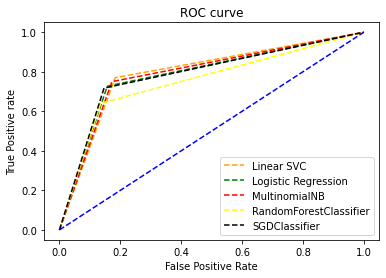

In [56]:
# matplotlib
import matplotlib.pyplot as plt


# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Linear SVC')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Logistic Regression')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='MultinomialNB')
plt.plot(fpr4, tpr4, linestyle='--',color='yellow', label='RandomForestClassifier')
plt.plot(fpr5, tpr5, linestyle='--',color='black', label='SGDClassifier')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')

plt.show()